# Evaluation

## Import packages

In [25]:
import os
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('/workspace/Competition/SLEEP/EEG/preprocess')
import rempy as rp

## Prediction with test dataset

In [11]:
# Load predictions
test_pred_path = '/workspace/Competition/SLEEP/EEG/data/results/predictions.csv'
test_pred = pd.read_csv(test_pred_path)

In [12]:
test_pred.head()

,Unnamed: 0,fname,state
0,0,c29_030418n1_5050.png,W
1,1,J45_100918n1_3459.png,W
2,2,c45_041018n1_7103.png,W
3,3,c21_020418n1_6261.png,N
4,4,c21_020418n1_5154.png,N


In [13]:
# Load actual states
test_ans_path = '/workspace/Competition/SLEEP/EEG/data/test/test1_labels.csv'
test_answer = pd.read_csv(test_ans_path)

In [14]:
test_answer.head()

,fname,state
0,c29_030418n1_5050.png,W
1,J45_100918n1_3459.png,W
2,c45_041018n1_7103.png,W
3,c21_020418n1_6261.png,N
4,c21_020418n1_5154.png,N


In [15]:
# sort the predictions into the same order as the answers
sorter = list(test_answer['fname'])
resdf = test_pred.set_index('fname')
resdf = resdf.loc[sorter].reset_index()

In [16]:
resdf.head()

,fname,Unnamed: 0,state
0,c29_030418n1_5050.png,0,W
1,J45_100918n1_3459.png,1,W
2,c45_041018n1_7103.png,2,W
3,c21_020418n1_6261.png,3,N
4,c21_020418n1_5154.png,4,N


In [17]:
# Calculate accuracy
answers = list(test_answer.state)
my_pred = list(resdf.state)
accuracy_score(my_pred, answers)

0.9495548961424333

## Plot confusion matrix

In [23]:
%matplotlib inline

Text(33.0, 0.5, 'Predictions')

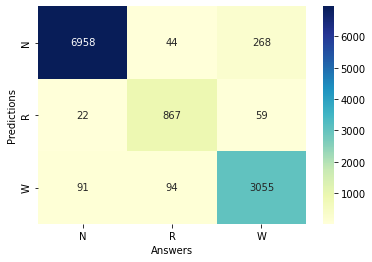

In [26]:
labels = ['N','R','W']
con_mat = confusion_matrix(my_pred, answers, labels=labels)

plt.figure()
sns.heatmap(con_mat, cmap='YlGnBu',xticklabels=labels,yticklabels=labels,annot=True,fmt='.0f')
plt.xlabel('Answers')
plt.ylabel('Predictions')
